# NLP LAB 6
### Zaidan Mufaddhal - AIU20092029

## 1. TextRank

In [1]:
# import BeautifulSoup and urllib libraries to fetch data from Website
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
# function to get data from Website
def get_only_text(url):
    page = urlopen(url)
    soup = BeautifulSoup(page)
    text = ''.join(map(lambda p: p.text, soup.find_all('p')))
    print(text)
    return soup.title.text, text

In [3]:
# mention the website url
url = 'https://en.wikipedia.org/wiki/Automatic_summarization'

In [4]:
# call the function created above
text = get_only_text(url)

Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content. Artificial intelligence algorithms are commonly developed and employed to achieve this, specialized for different types of data.
Text summarization is usually implemented by natural language processing methods, designed to locate the most informative sentences in a given document.[1] On the other hand, visual content can be summarized using computer vision algorithms. Image summarization is the subject of ongoing research; existing approaches typically attempt to display the most representative images from a given image collection, or generate a video that only includes the most important content from the entire collection.[2][3][4] Video summarization algorithms identify and extract from the original video content the most important frames (key-frames), and/or the most important video 

In [5]:
# count the number of letters
len('.join(text)')

11

In [6]:
# lets see first 1000 letters form the text
text[:1000]

('Automatic summarization - Wikipedia',
 'Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content. Artificial intelligence algorithms are commonly developed and employed to achieve this, specialized for different types of data.\nText summarization is usually implemented by natural language processing methods, designed to locate the most informative sentences in a given document.[1] On the other hand, visual content can be summarized using computer vision algorithms. Image summarization is the subject of ongoing research; existing approaches typically attempt to display the most representative images from a given image collection, or generate a video that only includes the most important content from the entire collection.[2][3][4] Video summarization algorithms identify and extract from the original video content the most important frames (ke

In [7]:
# import summarize form gensim
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords

In [8]:
# convert text to string format
text = str(text)

In [9]:
# summarize the text with ratio 0.1 (10% of the total words)
summarize(text, ratio=0.1)

'Artificial intelligence algorithms are commonly developed and employed to achieve this, specialized for different types of data.\\nText summarization is usually implemented by natural language processing methods, designed to locate the most informative sentences in a given document.[1] On the other hand, visual content can be summarized using computer vision algorithms.\nImage summarization is the subject of ongoing research; existing approaches typically attempt to display the most representative images from a given image collection, or generate a video that only includes the most important content from the entire collection.[2][3][4] Video summarization algorithms identify and extract from the original video content the most important frames (key-frames), and/or the most important video segments (key-shots), normally in a temporally ordered fashion.[5][6][7][8] Video summaries simply retain a carefully selected subset of the original video frames and, therefore, are not identical to

In [10]:
# keywords
print(keywords(text, ratio=0.1))

summarized
summarizes
summarizing
keyphrases
keyphrase
summary
automatic summarization
text
texts
algorithms
algorithm
algorithmically
document
documents
informativeness
model
models
modeling
summaries simply
informative sentences
sentence
evaluation
evaluates
evaluate
evaluations
generally evaluated
relevant information
new
feature
features
rank
ranked
ranks
generate
general
generic
generating
generates
generated
extract
extraction
extracted
extractive
extracting
methods
method
videos news
problem
problems
results
resulting
result
examples
example
based
video
learning
learn
learned
relevance
human
humans
important
importance
similarity
similar
automatically
different
difference
differ
unigram
unigrams
like
likely
graph ranking
process
processing
processes
set
sets
words
word
training
textrank
abstraction
abstract
abstractive
abstracts
function
functions
content
research
researchers
use
useful
uses
tasks
task
multi
phrases
phrase
create
creates
created
creating
supervised
supervision
f

## 2. Feature-based text summarization

In [11]:
!pip install sumy

     -------------------------------------- 97.3/97.3 kB 696.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 10.1/10.1 MB 1.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21695 sha256=30df63f7d7af2114c377f5561d45a92c07283f6eb533da7bbc978763bcd907bd
  Stored in directory: c:\users\zaida\appdata\local\pip\cache\wheels\ba\9f\70\7795228568b81b57a8932755938da9fb1f291b0576752604aa
  Created 

In [75]:
# improt the packages
from sumy.parsers.html import HtmlParser
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.summarizers.luhn import LuhnSummarizer

In [76]:
# extracting and summarizing
LANGUAGE = 'english'
SENTENCES_COUNT = 10

In [77]:
url = 'https://en.wikipedia.org/wiki/Automatic_summarization'
parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
summarizer = LsaSummarizer()
summarizer = LsaSummarizer(Stemmer(LANGUAGE))
summarizer.stop_words = get_stop_words(LANGUAGE)
for sentence1 in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence1)

Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content.
Some techniques and algorithms which naturally model summarization problems are TextRank and PageRank, Submodular set function, Determinantal point process, maximal marginal relevance (MMR) etc.
"The Army Corps of Engineers, rushing to meet President Bush's promise to protect New Orleans by the start of the 2006 hurricane season, installed defective flood-control pumps last year despite warnings from its own expert that the equipment would fail during a storm, according to documents obtained by The Associated Press".
Although the system exhibited good results, the researchers wanted to explore the effectiveness of a maximum entropy(ME) classifier for the meeting summarization task, as ME is known to be robust against feature dependencies.
Automatic summaries present information extracte

## 3. LexRank

In [78]:
# lexrank
import sumy

#import the parser and tokenizer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

In [79]:
# import the LexRank summarizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [80]:
# initializing the parser
my_parser = PlaintextParser.from_string(text, Tokenizer('english'))

In [81]:
# create a summary of 3 sentences
lex_rank_summarizer = LexRankSummarizer()
lexrank_summary = lex_rank_summarizer(my_parser.document, sentences_count=3)

In [82]:
# print the summary
for sentence2 in lexrank_summary:
    print(sentence2)

They can enable document browsing by providing a short summary, improve information retrieval (if documents have keyphrases assigned, a user could search by keyphrase to produce more reliable hits than a full-text search), and be employed in generating index entries for a large text corpus.\nDepending on the different literature and the definition of key terms, words or phrases, keyword extraction is a highly related theme.\nBeginning with the work of Turney,[15] many researchers have approached keyphrase extraction as a supervised machine learning problem.\nGiven a document, we construct an example for each unigram, bigram, and trigram found in the text (though other text units are also possible, as discussed below).
The main difficulty in supervised extractive summarization is that the known summaries must be manually created by extracting sentences so the sentences in an original training document can be labeled as "in summary" or "not in summary".
The two methods were developed by 

## 4. LSA (Latent Semantic Analysis)

In [83]:
# import the summarizer
from sumy.summarizers.lsa import LsaSummarizer

In [84]:
# parsing the text string using PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser = PlaintextParser.from_string(text, Tokenizer('english'))

In [85]:
# create the summarizer
lsa_summarizer = LsaSummarizer()
lsa_summary = lsa_summarizer(parser.document,3)

In [86]:
# print the summary
for sentence3 in lsa_summary:
    print(sentence3)

Automatic summaries present information extracted from multiple sources algorithmically, without any editorial touch or subjective human intervention, thus making it completely unbiased.
[38]\nThe main drawback of the evaluation systems so far is that we need a reference summary (for some methods, more than one), to compare automatic summaries with models.
Although they did not replace other approaches and are often combined with them, by 2019 machine learning methods dominated the extractive summarization of single documents, which was considered to be nearing maturity.


## 5. KL-Sum

In [87]:
# import libraries
from sumy.summarizers.kl import KLSummarizer

In [88]:
# create the parser
from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser = PlaintextParser.from_string(text, Tokenizer('english'))

In [89]:
# Instantiating the KLSummarizer
kl_summarizer = KLSummarizer()
kl_summary = kl_summarizer(parser.document, sentences_count=3)

In [90]:
#print the summary
for sentence4 in kl_summary:
    print(sentence4)

[11]\nAbstractive summarization methods generate new text that did not exist in the original text.
This is also called the core-set.
The main difficulty in supervised extractive summarization is that the known summaries must be manually created by extracting sentences so the sentences in an original training document can be labeled as "in summary" or "not in summary".


## Extra activity 1 - Word Cloud

In [54]:
# let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [55]:
text

'(\'Automatic summarization - Wikipedia\', \'Automatic summarization is the process of shortening a set of data computationally, to create a subset (a summary) that represents the most important or relevant information within the original content. Artificial intelligence algorithms are commonly developed and employed to achieve this, specialized for different types of data.\\nText summarization is usually implemented by natural language processing methods, designed to locate the most informative sentences in a given document.[1] On the other hand, visual content can be summarized using computer vision algorithms. Image summarization is the subject of ongoing research; existing approaches typically attempt to display the most representative images from a given image collection, or generate a video that only includes the most important content from the entire collection.[2][3][4] Video summarization algorithms identify and extract from the original video content the most important frames

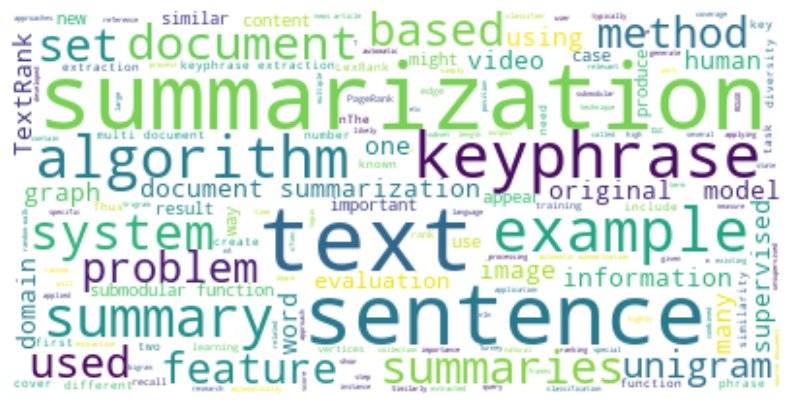

In [57]:
# summary for text
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Extra Activity 2 - WordNet

In [58]:
#import library
from nltk.corpus import wordnet

In [61]:
for words in wordnet.synsets("summarize"):
    print(words)

Synset('sum_up.v.01')
Synset('summarize.v.02')


In [62]:
#how many differnet meanings
for words in wordnet.synsets("summarize"):
    for lemma in words.lemmas():
        print(lemma)

Lemma('sum_up.v.01.sum_up')
Lemma('sum_up.v.01.summarize')
Lemma('sum_up.v.01.summarise')
Lemma('sum_up.v.01.resume')
Lemma('summarize.v.02.summarize')
Lemma('summarize.v.02.summarise')
Lemma('summarize.v.02.sum')
Lemma('summarize.v.02.sum_up')


In [63]:
# all details for a word
word = wordnet.synsets('summarize')[0]

In [64]:
# checking name
print(word.name())

# checking definition
print(word.definition())

# checking examples
print(word.examples)

sum_up.v.01
give a summary (of)
<bound method Synset.examples of Synset('sum_up.v.01')>


#### a. Hyponym

In [65]:
word = wordnet.synsets('summarize')[0]

word.hyponyms()

[Synset('abstract.v.04'),
 Synset('docket.v.02'),
 Synset('precis.v.01'),
 Synset('recapitulate.v.01')]

#### b. Synonyms

In [66]:
synonyms = []

for words in wordnet.synsets('summarization'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        
synonyms

['summarization', 'summarisation']

#### c. Antonyms

In [67]:
antonyms = []

In [69]:
for words in wordnet.synsets('summarize'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
            
antonyms

[]